In [4]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
titanic=pd.read_csv("train.csv")

In [6]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


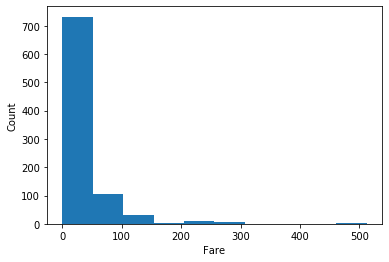

In [8]:
plt.hist(titanic.Fare)
plt.xlabel("Fare")
plt.ylabel("Count")
plt.show()

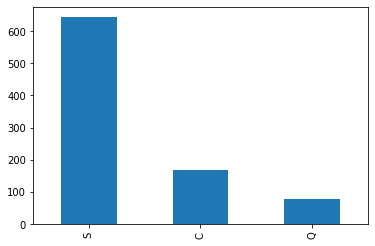

In [9]:
titanic.Embarked.value_counts().plot(kind="bar")
plt.show()

In [10]:
boool=np.isnan(titanic.Age)
titanic["Age"][boool]
a=np.mean(titanic.Age)
titanic.loc[boool,"Age"]=a
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [11]:
pd.crosstab(titanic.Pclass,titanic.Survived,margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [12]:
pd.crosstab(titanic.Sex,titanic.Survived,margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [13]:
pd.crosstab(titanic.SibSp,titanic.Survived,margins=True)

Survived,0,1,All
SibSp,,,
0,398,210,608
1,97,112,209
2,15,13,28
3,12,4,16
4,15,3,18
5,5,0,5
8,7,0,7
All,549,342,891


In [14]:
pd.crosstab(titanic.Parch,titanic.Survived,margins=True)

Survived,0,1,All
Parch,,,
0,445,233,678
1,53,65,118
2,40,40,80
3,2,3,5
4,4,0,4
5,4,1,5
6,1,0,1
All,549,342,891


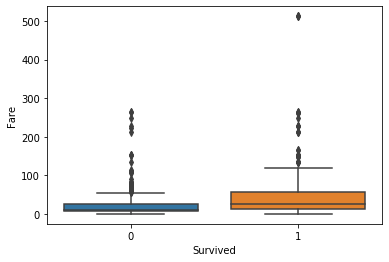

In [15]:
sns.boxplot(x=titanic.Survived,y=titanic.Fare)
plt.show()

In [16]:
import statistics as sp
p=pd.isna(titanic.Embarked)
v=sp.mode(titanic.Embarked)
titanic.loc[p,"Embarked"]=v

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [18]:
X = titanic.drop(["Name","PassengerId","Ticket","Cabin"],axis=1)

In [19]:
cat_col = X.select_dtypes(include=['object']).columns
dummies = pd.get_dummies(X[cat_col],drop_first=True)
without_dummies = X.drop(cat_col,axis=1)

In [20]:
data = pd.concat([dummies,without_dummies],axis=1)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Sex_male      891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
Survived      891 non-null int64
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [22]:
data.head(5)

,Sex_male,Embarked_Q,Embarked_S,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,1,0,3,22.0,1,0,7.2500
1,0,0,0,1,1,38.0,1,0,71.2833
2,0,0,1,1,3,26.0,0,0,7.9250
3,0,0,1,1,1,35.0,1,0,53.1000
4,1,0,1,0,3,35.0,0,0,8.0500


In [23]:
y = data["Survived"]
x= data.drop("Survived",axis=1)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                    test_size=0.3,random_state=1)
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
ypred  = logreg.predict(x_test)
from sklearn import metrics
metrics.log_loss(y_test,ypred)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


7.9903765971287175

In [24]:
metrics.accuracy_score(y_test,ypred)

0.7686567164179104

In [25]:
metrics.confusion_matrix(y_test,ypred)

array([[132,  21],
       [ 41,  74]], dtype=int64)

In [26]:
print(metrics.classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.64      0.70       115

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



0.7531116794543904


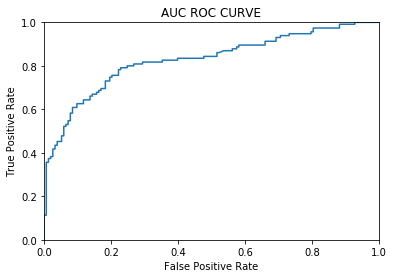

In [27]:
from sklearn.metrics import roc_auc_score,roc_curve
log_roc_curve = roc_auc_score(y_test,ypred)
print(log_roc_curve)
fpr,tpr,threshold = roc_curve(y_test,
                              logreg.predict_proba(x_test)[:,1])
#plt.figure()
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title("AUC ROC CURVE")
plt.show()

In [185]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=60)
knn_model.fit(x_train,y_train)
ypred_knn=knn_model.predict(x_test)
print(metrics.accuracy_score(y_test,ypred_knn))

0.6194029850746269


In [236]:
?KNeighborsClassifier

In [233]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=6,min_samples_split=52,min_samples_leaf=10)
dt.fit(x_train,y_train)
ypred_dt=dt.predict(x_test)
print(metrics.accuracy_score(y_test,ypred_dt))

0.75


In [234]:
?DecisionTreeClassifier

In [184]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100)
forest.fit(x_train,y_train)
ypred_forest=forest.predict(x_test)
print(metrics.accuracy_score(y_test,ypred_forest))

0.7686567164179104


In [164]:
?RandomForestClassifier